#14757 Homework 4 (150 pts)

## **Due:** Wednesday November 6 at 3pm ET / 12 noon ET

## Submission Instructions

*   Download your completed notebook by clicking File->Download .ipynb and submit it on Gradescope
*   Check your submission on Gradescope to make sure that all your code, code output and written responses appear correctly

## Problem 1: Gradescope Autograder Placeholder (0 pts)

Gradescope requires that problem 1 be autograded for code submissions, but there are no autograded problems. Continue to problem 2.

## Problem 2: Investigating Adverse Selection with a Linear Regression Model (25 pts)

In this problem you will attempt to make a profit as an iBuyer (instant buyer) in the real estate market by using a linear regression model to predict home values. You can read more about the iBuyer business model at https://en.wikipedia.org/wiki/Instant_buyer.

Imagine it is April 2021 and your iBuyer business is operating in Cupertino, California. You have access to data for all single family houses sold in Cupertino in March 2021. From the data you build a linear regression model that fits sale price to square footage and lot size, and you use this model to predict house values.

Your contacts in the real estate industry tell you about several houses that are about to hit the market and are on track to be sold in May to traditional buyers. You make instant offers to the sellers to buy their houses in April and you sell the houses to the traditional buyers in May. We will use May 2021 sales data to determine how much profit you make.

Before you begin take a look at the original data for this problem that comes from the following sources:
* March 2021: https://julianalee.com/cupertino/real-estate-sales/cupertino-home-sales-2021-03.htm
* May 2021: https://julianalee.com/cupertino/real-estate-sales/cupertino-home-sales-2021-05.htm

Run the cell below to load the data and fit the linear regression model to the March 2021 data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load sales data from March 2021 and May 2021
march_url = 'https://www.andrew.cmu.edu/user/dvaroday/14757/data/hw4/March2021.txt'
may_url = 'https://www.andrew.cmu.edu/user/dvaroday/14757/data/hw4/May2021.txt'
df_march = pd.read_csv(march_url)
df_may = pd.read_csv(may_url)

# Fit linear regression model for 'SALE PRICE' to 'SQFT' and 'LOTSZ'
# using March 2021 sales data
X_train = df_march[['SQFT', 'LOTSZ']]
y_train = df_march[['SALE PRICE']]
model = LinearRegression().fit(X_train, y_train)
print('R^2:', model.score(X_train, y_train))

R^2: 0.9124129938718853


**2.1** (5 pts) Assume that you make offers on all the houses in the May 2021 data and that **all** your offers are accepted. Your offer prices are the values predicted by your model. Then you sell all the houses you bought to traditional buyers at the sale prices in the May data. Edit the code in the cell below to print out your total profit in dollars.

In [23]:
X_test = df_may[['SQFT', 'LOTSZ']]
y_test = df_may[['SALE PRICE']]

# START EDITING HERE - DON'T REMOVE THIS COMMENT
# Solving using vectorized operations
model_prices = model.predict(X_test) # produces array of model predictions, .flatten() to produce 1-D array
difference = y_test.values - model_prices  # y_test minus predictions because we subtract actual sale from prediction
profit_all = difference.sum()
# END EDITING HERE - DON'T REMOVE THIS COMMENT

print('Total profit when you buy all houses:', int(profit_all), 'dollars')

Total profit when you buy all houses: 1454410 dollars


In [25]:
print(type(model_prices))
list_price = df_may[['ORIG LSPRC']]
print(list_price.values)


<class 'numpy.ndarray'>
[[1999000]
 [2195000]
 [1998000]
 [2450000]
 [1838000]
 [1998000]
 [1998000]
 [1999000]
 [2388000]
 [2800088]
 [2688000]
 [2268000]
 [2298000]
 [2295000]
 [2088000]
 [2388000]
 [2950000]
 [2268000]
 [2488000]
 [2988000]
 [2888000]
 [2895000]
 [2788000]
 [3199000]
 [2888000]
 [3880000]
 [4380000]]


**2.2** (10 pts) Now assume you that make the same offers on the same houses but only **some** of your offers are accepted. Specifically, a seller only sells you their house if your offer exceeds their original list price (`ORIG LSPRC`). We assume that at the time the seller receives your offer, they know this intended original list price but you don't know it because they haven't announced it publicly yet.

As before, you sell all the houses you bought to traditional buyers at the sale prices in the May data. Edit the code in the cell below to print out your total profit in dollars.

In [33]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT
list_price = df_may['ORIG LSPRC']
bool_filter = list_price.values.flatten() < model_prices.flatten() # needed to make bool_filter a 1D-array
# print(bool_filter)
bought_houses = df_may[bool_filter]['SALE PRICE']
# print(bought_houses.values)
# print(model_prices[bool_filter])
difference = bought_houses.values - model_prices[bool_filter]
profit_some = difference.sum()

# END EDITING HERE - DON'T REMOVE THIS COMMENT

print('Total profit when you buy some of the houses:', int(profit_some), 'dollars')

Total profit when you buy some of the houses: -12640539 dollars


**2.3** (10 pts) Read the following article about why Zillow shut down its iBuyer business in November 2021 and pay attention to the analogy about lemons and peaches.

https://www.gsb.stanford.edu/insights/flip-flop-why-zillows-algorithmic-home-buying-venture-imploded

Explain in 2-4 sentence why in this problem you buy "lemons" on average when sellers only accept your offers if they exceed the original list prices.

WRITE YOUR ANSWER HERE:
In this problem, the algorithm is set to determine the average price of all houses including lemons and peaches. However, sellers of peaches generally want more for their house than an average of lemons and peaches while sellers of lemons are more than happy to accept your offer as your offer made from an average of lemons and peaches as they benefit from being lumped in with the peaches. The problem is that the algorithm does not have enough information on the quality of home to differentiate between lemons and peaches and to adjust the offer accordingly.

## Problem 3: Interpreting Principal Components Analysis (PCA) (55 pts)

In this problem you will implement PCA from linear algebra primitives and interpret its output. Run the cell below to:

*   load a data set of physical properties of seeds from three varieties of wheat
*   plot a projection of the data on to the first two principal components

The data set is described at http://archive.ics.uci.edu/ml/datasets/seeds

,area,perimeter,compactness,length,width,asymmetry coef,length of groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Text(0.5, 1.0, 'Projection on to first 2 principal components')

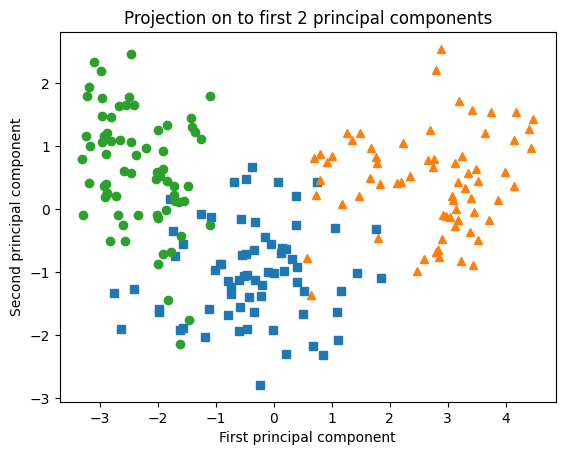

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
url = 'https://www.andrew.cmu.edu/user/dvaroday/14757/data/hw4/seeds_dataset.txt'
df = pd.read_table(url, sep='\s+', header=None,
                   names=['area', 'perimeter','compactness','length','width',
                          'asymmetry coef', 'length of groove', 'variety'])
display(df)

# Separate labels and features
labels = df['variety']
features = df.drop('variety', axis=1)

# Standardize features
standardized_features = StandardScaler().fit_transform(features)

# Project data on to first 2 principal components
pca = PCA(n_components=2)
pca.fit(standardized_features)
pcs = pca.transform(standardized_features)

# Plot projection
style = ['o', '^', 's']
for i in np.unique(labels):
  plt.plot(pcs[labels==i,0], pcs[labels==i,1], style.pop())
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection on to first 2 principal components')

In [38]:
print(type(labels))

<class 'pandas.core.series.Series'>


**3.1** (10 pts) Could you build a good classifier for wheat variety based on this data set? Why? Limit your answer to 1-3 sentences.

WRITE YOUR ANSWER HERE:
Yes, based on the separation of the data projected onto the 1st two principal components, you should be able to build a decent classifier on this data set using even just a simple SVM with SGD to save on computational expense. I would also try k-NN of 3 to 5 neighbors given some of the outliers or a Random Forest Classifier though that could get more computationally expensive.

**3.2** (10 pts) Write code in the cell below to reproduce the plot of the projection on to the first two principal components *without* using the `sklearn` libraries. In other words, you can use the existing variables `labels` and `features`, but you must reimplement standardization and PCA yourself. You can perform the eigendecomposition using `np.linalg.eig()`.

Text(0.5, 1.0, 'Projection on to first 2 principal components')

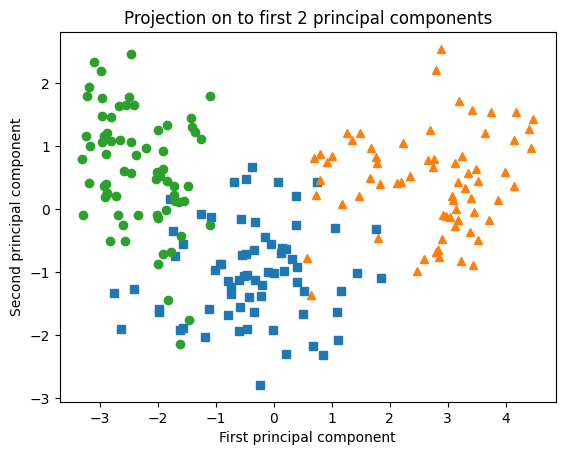

In [49]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT
'''
Using vectorized application with numpy and no for loops
Steps from Lecture:
1) Standardize
  - Find means of features
  - Find std_dev or features
  - Take means and divide by standard deviation 
    - important to use std_dev for robust feature scaling as some features
      could have different units of measurement
2) Get Covariance Matrix
  - Important to use for diagonalization of the cov_matrix to get Eigens
3) Get Eigenvalues and Eigenvectors
  - np.linalg.eig() is a built-in numpy method for this
4) Sort Eigens in descending order
5) Project Data
  - Multiply standardized data by first X (in this case 2)
  Eigenvectors (because they're in desc order) to project data
  into components with maximum variance.
'''
# Step 1
# convert features to numpy first or all Features variables will be DF and affect compatibility
feats = features.to_numpy()
features_means = np.mean(feats, axis=0)
features_stddev = np.std(feats, axis=0)
features_standardized = (feats - features_means) / features_stddev

# Step 2
cov_mat = np.cov(features_standardized, rowvar=False)

# Step 3
eigenvals, eigenvecs = np.linalg.eig(cov_mat)

# Step 4
idx = np.argsort(eigenvals)[::-1] # Create desc order
# Apply desc order
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]

# Step 5
pcs_from_eig = features_standardized.dot(eigenvecs[:, :2])

# END EDITING HERE - DON'T REMOVE THIS COMMENT

# Plot projection on to first 2 principal components
style = ['o', '^', 's']
for i in np.unique(labels):
  plt.plot(pcs_from_eig[labels==i,0], pcs_from_eig[labels==i,1], style.pop())
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection on to first 2 principal components')

**3.3** (10 pts) Are the two projection plots identical? Think about whether the unit-length eigenvectors have to be the same in both cases and then explain in what ways the two projection plots could be different to each other. Limit your answer to 1-4 sentences.

WRITE YOUR ANSWER HERE:
The two plots are pretty much identical. I'm not quite sure what you mean about the unit-length eigenvectors being the "same" which could be direction and magnitude. As we're lookin only for orthogonality with the covariance matrix in computing the eigenvectors, their direction does not matter, and the magnitudes should be approximately the "same" (given limitations in accuracy in non-specialized computer programs). However, I believe that if the signs were different, the plot might not look indentical, but you would have the same separation of information just flipped.

**3.4** (10 pts) Edit the code below to plot the fraction of variance preserved in the standardized features against the number of principal components used to represent the data set.

[0.71874303 0.88982486 0.9866825  0.99644885 0.99912222 0.99988394
 1.        ]


Text(0, 0.5, 'Fraction of variance preserved')

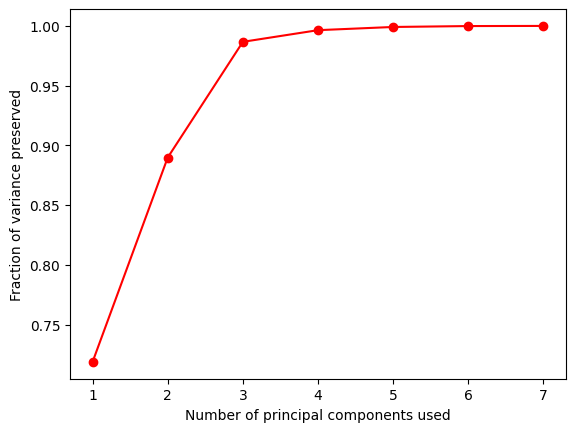

In [ ]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT
'''
To calculate the fraction of variance preserved wrt the number
of principal components used, you need to use a cumulative sum
which adds up eigenvals (the variance captured by a given eigenvector)
as you go in the array (1, 1+2, 1+2+3, etc.) divided by the overall
total variance (sum of all eigenvals). Why? Well as you examine more
principal components you each one allows the model to capture more information.
This is important because for high-D data, you may want to stop at a certain
inflection point to save on computational expense like with 3
principal components as seen below.
'''

fraction_variance_preserved = np.cumsum(eigenvals) / np.sum(eigenvals) # running fraction of variance preserved / total variance

# END EDITING HERE - DON'T REMOVE THIS COMMENT

print(fraction_variance_preserved)
plt.plot(range(1,8), fraction_variance_preserved, 'ro-')
plt.xlabel('Number of principal components used')
plt.ylabel('Fraction of variance preserved')

**3.5** (5 pts) What is the smallest number of principal components you should use to represent the data set in order to preserve at least 98% of the variance in the standardized features?

WRITE YOUR ANSWER HERE:
The smallest number of principal components to preserve at least 98% of the variance is **3**

**3.6** (10 pts) Why is it important to standardize the features of this data set before applying PCA? Explain in 1-3 sentences

WRITE YOUR ANSWER HERE:
PCA is sensitive to the relative measurements of individual features. As the eigenvectors determine the directions of maximum variance in the data, features with larger relative measurement numbers would dominate the variance calculations. For example, 1-2 feet would have less of an impact than 20 inches

## Problem 4: Network Traffic Anomaly Detection with PCA (70 pts)

In this problem you will take a network traffic anomaly detector for an internet backbone network and make it adaptive, and then stress test the detector's vulnerability against a denial-of-service (DoS) attack.

You will work with data from the Internet2 Abilene research network. A simplified version of the network considered in this problem consists of 11 nodes and 28 unidirectional links (i.e. a pair of links for each red line in the diagram below.) There are total of 110 possible end-to-end flows because there are 11 possible sources, which can each send to 10 other destinations.

For your interest you can read more about the Abiline network at the following links:

*   https://en.wikipedia.org/wiki/Abilene_Network
*   http://sigcomm.org/education/ebook/SIGCOMMeBook2013v1_chapter3.pdf (see section 2.1)
*   https://www.cs.utexas.edu/~yzhang/research/AbileneTM/ (raw data)

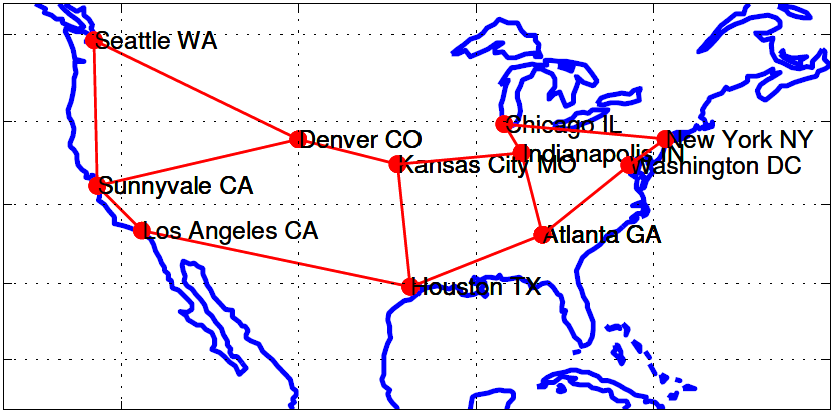

### Downloading the data

Run the cell below to download and unzip `abilene.zip`. The data will be attached to this notebook. Note that you may have to rerun this cell if you leave your notebook idle for a few hours.

In [ ]:
!wget https://www.andrew.cmu.edu/user/dvaroday/14757/data/hw4/abilene.zip
!unzip ./abilene.zip -d ./

### Understanding the network

Run the cell below to load the network's routing matrix and associated row and column labels. The rows of `routing_matrix` map to `link_labels` and the columns map to `flow_labels`. The `(row,col)` entry of `routing_matrix` is

*   1 if the flow `col` is routed through the link `row`
*   0 otherwise

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load routing matrix
filename = 'routing_matrix_28x110.csv'
routing_matrix = np.genfromtxt(filename, delimiter=',').astype(int)
num_links, num_flows = routing_matrix.shape
print('num_links =', num_links)
print('num_flows =', num_flows)

# Load link labels (rows of routing matrix)
filename = 'link_labels.csv'
df = pd.read_table(filename, sep=',')
link_labels = df['Link'].tolist()
print('Links:', link_labels)

# Load flow labels (columns of routing matrix)
filename = 'flow_labels.csv'
df = pd.read_table(filename, sep=',')
flow_labels = df['Flow'].tolist()
print('Flows:', flow_labels)

num_links = 28
num_flows = 110
Links: ['Atlanta->Houston', 'Atlanta->Indianapolis', 'Atlanta->Washington', 'Chicago->Indianapolis', 'Chicago->New York City', 'Denver->Kansas City', 'Denver->Sunnyvale', 'Denver->Seattle', 'Houston->Atlanta', 'Houston->Kansas City', 'Houston->Los Angeles', 'Indianapolis->Atlanta', 'Indianapolis->Chicago', 'Indianapolis->Kansas City', 'Kansas City->Denver', 'Kansas City->Houston', 'Kansas City->Indianapolis', 'Los Angeles->Houston', 'Los Angeles->Sunnyvale', 'New York City->Chicago', 'New York City->Washington', 'Sunnyvale->Denver', 'Sunnyvale->Los Angeles', 'Sunnyvale->Seattle', 'Seattle->Denver', 'Seattle->Sunnyvale', 'Washington->Atlanta', 'Washington->New York City']
Flows: ['Atlanta->Chicago', 'Atlanta->Denver', 'Atlanta->Houston', 'Atlanta->Indianapolis', 'Atlanta->Kansas City', 'Atlanta->Los Angeles', 'Atlanta->New York City', 'Atlanta->Sunnyvale', 'Atlanta->Seattle', 'Atlanta->Washington', 'Chicago->Atlanta', 'Chicago->Denver', 'Chicago->Houston',

In [73]:
# Never seen a routing table or routing policy so printing it here
print(routing_matrix)


[[0 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]


**4.1** (10 pts) Edit the code in the cell below to print out which flows traverse the most links in the network.

In [60]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT
'''
Need the routing matrix as it's the only data structure that
contains information mapping flows to links. Which looks like so:
 [[0 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]

1 means a flow uses the link, 0 means it does not. And each flow is a column

Steps to find longest flows:
1) Sum the columns (total num links in a given flow)
2) Find max of num in that new 1-D array
3) Find flows that = size of max num of links in a given flow
4) Map indices to flow_labels to get the flow "name"
'''
# Step 1
total_num_links_per_flow = np.sum(routing_matrix, axis=0)

# Step 2
max_links = np.max(total_num_links_per_flow)

# Step 3
max_link_indices = np.where(total_num_links_per_flow == max_links)[0]
# print(max_flow_indices)

# Step 4
longest_flows = [flow_labels[i] for i in max_link_indices]

# END EDITING HERE - DON'T REMOVE THIS COMMENT

for flow in longest_flows:
  print(flow)

Los Angeles->New York City
New York City->Los Angeles
Sunnyvale->Washington
Seattle->Washington
Washington->Sunnyvale
Washington->Seattle


**4.2** (10 pts) Next print out which links are traversed by the most flows.

In [70]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT
'''
Now, do sum the opposite way (28, 110) of (links, flows).
We did axis=0 to get links in flow, now do axis=1 to get
flows in links (or flows that go through a given link really)

Steps to find most traversed links:
1) Sum the rows (total num links in a given flow)
2) Find max of num in that new 1-D array
3) Find links that = size of max num of flows through a given link
4) Map indices to link_labels to get the flow "name"
'''
# Step 1
num_flows_per_link = np.sum(routing_matrix, axis=1)
# print(num_flows_per_link)
# Step 2
max_flows_per_link = np.max(num_flows_per_link)
# print(max_flows_per_link)

# Step 3
max_flows_indices = np.where(num_flows_per_link == max_flows_per_link)[0]
# print(max_flows_indices)
# Step 4
most_traversed_links = [link_labels[i] for i in max_flows_indices]

# END EDITING HERE - DON'T REMOVE THIS COMMENT

for link in most_traversed_links:
  print(link)

Indianapolis->Kansas City
Kansas City->Indianapolis


### Preparing the traffic data

Run the cell below to

*   load end-to-end flow traffic measurements for the network
*   aggregate the flow traffic measurements into link traffic measurements

(Note that the data has been simplified for educational purposes.)

This data consists of end-to-end flow traffic measurements taken once every 30 minutes for 6 weeks. The data for each week is stored in a separate file. So there are 110 measurements per sample and 336 samples per week. The data is arranged in a 3D array `flow_traffic` of shape (336, 110, 6). For simplicity, assume each measurement is in units of bits per second (bps).

In the next part of this problem you are going to play the role of the ISP that operates this backbone network. Notice that the ISP *cannot* see the flow traffic measurements directly because traditional IP packets do not contain flow identifiers. But the ISP can see the traffic on each link because it operates the routers.

So the code below also aggregates the 110 flow traffic measurements into 28 link traffic measurements for each sample and each week. This data is arranged in a 3D array `link_traffic` of shape (336, 28, 6).

The ISP can perform network anomaly detection using the link traffic.

In [71]:
num_samples = 336
num_weeks = 6

# Load six weeks of flow traffic measurements
flow_traffic = np.zeros((num_samples, num_flows, num_weeks))
for wk in range(num_weeks):
  filename = 'flowtraffic_336x110_wk' + str(wk) + '.csv'
  flow_traffic[:,:,wk] = np.genfromtxt(filename, delimiter=',')

# Aggregate flow traffic into link traffic measurements
link_traffic = np.zeros((num_samples, num_links, num_weeks))
for wk in range(num_weeks):
  link_traffic[:,:,wk] = np.matmul(flow_traffic[:,:,wk], routing_matrix.T)

print('Shape of flow_traffic:', flow_traffic.shape)
print('Shape of link_traffic:', link_traffic.shape)

Shape of flow_traffic: (336, 110, 6)
Shape of link_traffic: (336, 28, 6)


### Running a link traffic anomaly detector

Now you play the role of the ISP. Run the link traffic anomaly detector in the cell below. The detector works as follows:

*   A PCA model with 4 principal components is fit to the link traffic of week 0
*   If link traffic at any time produces a residual greater than 300 Mbps with respect to the PCA model, then that link traffic is considered an anomaly

The box plots display the traffic residuals for weeks 1 to 5. There are no anomalies because the residuals are all below the threshold.

/tmp/ipykernel_55349/253385836.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(saved_residuals, labels=wks)


Text(0, 0.5, 'traffic residual (bps)')

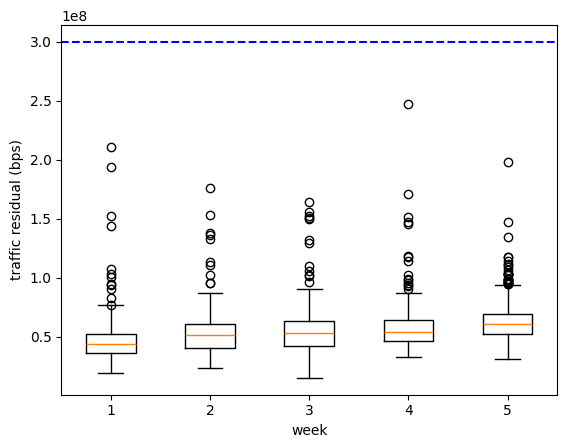

In [72]:
def get_residuals(pc_model, data):
  # project data onto principal components
  projections = pc_model.transform(data)
  # reconstruct projections back into original space
  reconstructions = pc_model.inverse_transform(projections)
  # compute difference between data and reconstructions
  differences = data - reconstructions
  # compute residuals as magnitude of difference vectors
  residuals = np.linalg.norm(differences, axis=1)
  return residuals

## Link Traffic Anomaly Detector

# Set a threshold of 300 Mbps on traffic residuals
threshold = 3e8

# Fit PCA model to link traffic of week 0
pca = PCA(n_components=4)
pca.fit(link_traffic[:,:,0])

# Apply PCA to weeks 1 to 5 and save traffic residuals
wks = range(1, num_weeks)
saved_residuals = [None for wk in wks]
for wk in wks:
  residuals = get_residuals(pca, link_traffic[:,:,wk])
  saved_residuals[wk-1] = residuals

# Week-by-week boxplots of traffic residuals with threshold shown in blue
plt.boxplot(saved_residuals, labels=wks)
plt.hlines(threshold, 0.5, 5.5, 'blue', 'dashed')
plt.xlabel('week')
plt.ylabel('traffic residual (bps)')

**4.3** (10 pts) In the box plots above notice that the median residual (shown in orange) is increasing as the weeks progress. Speculate in 1-2 sentences about why a real network could cause this phenomenon.

WRITE YOUR ANSWER HERE:
My assumption for the increasing median residual is simply the slow but sure growth of the internet and traffic that flows through an ISP given the number of connected people and growing number of applications to serve those connected people.

### Running an adaptive link traffic anomaly detector

**4.4** (10 pts) The increase in median residual over time is a problem because if it continues eventually even typical network link traffic may be detected as anomalous. Edit the anomaly detector code in the cell below to make it adaptive. Specifically you should refit the PCA model on the previous week's data before applying it to the current week's data. You should see that the box plots do not show an increasing trend in median residual over time.

/tmp/ipykernel_55349/344659876.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(saved_residuals, labels=wks)


Text(0, 0.5, 'traffic residual (bps)')

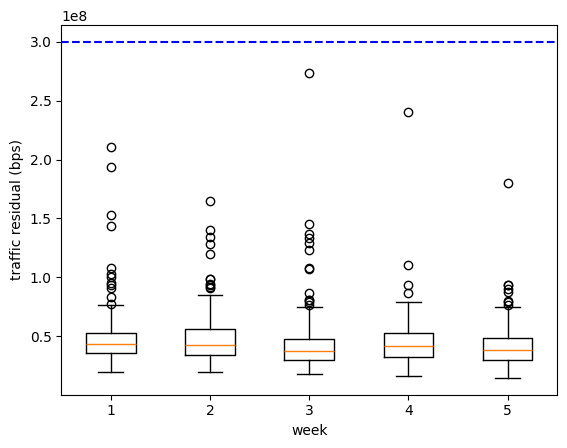

In [74]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT

# Fit PCA model to link traffic of week 0
pca.fit(link_traffic[:,:,0])

# Apply PCA to weeks 1 to 5 and save traffic residuals
saved_residuals = [None for wk in wks]
for wk in wks:
  '''
  Pretty simply, just retraining the data on the
  previous week's data but still getting residuals
  for the current week
  '''
  pca.fit(link_traffic[:,:, wk-1])

  residuals = get_residuals(pca, link_traffic[:,:,wk])
  saved_residuals[wk-1] = residuals

# END EDITING HERE - DON'T REMOVE THIS COMMENT

# Week-by-week boxplots of traffic residuals with threshold shown in blue
plt.boxplot(saved_residuals, labels=wks)
plt.hlines(threshold, 0.5, 5.5, 'blue', 'dashed')
plt.xlabel('week')
plt.ylabel('traffic residual (bps)')

### Stress testing the nonadaptive link traffic anomaly detector

Run the cell below to perform a stress test against the nonadaptive link traffic anomaly detector. The stress test works as follows:

*   One end-to-end flow is chosen as the `stress_flow` (in this case, Los Angeles->New York City)
*   For each week in weeks 1 to 5, the flow traffic along `stress_flow` is doubled until an anomaly is detected
*   The number of doublings achieved before detection is saved for each week

The bar chart shows that the maximum doublings is stable over all weeks.

Text(0, 0.5, 'maximum doublings before detection')

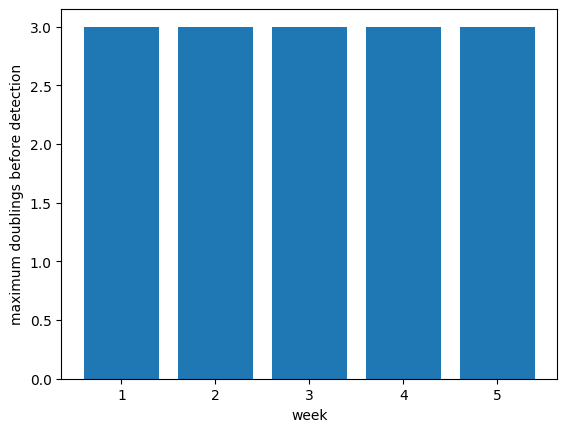

In [75]:
stress_flow = flow_labels.index('Los Angeles->New York City')

# Fit PCA model to link traffic of week 0
pca.fit(link_traffic[:,:,0])

saved_doublings = np.zeros(len(wks))

for wk in wks:
  # Copy original flow traffic for this week
  flow_traffic_stressed = flow_traffic[:,:,wk].copy()

  # Keep doubling traffic along stressed flow until an anomaly is detected
  for doubling in range(1,20):

    flow_traffic_stressed[:,stress_flow] *= 2
    link_traffic_stressed = np.matmul(flow_traffic_stressed, routing_matrix.T)
    residuals = get_residuals(pca, link_traffic_stressed)

    # if anomaly detected, break before saving
    if any(residuals > threshold):
      break

    saved_doublings[wk-1] = doubling

# Week-by-week bar chart of maximum doublings of stressed flow before detection
plt.bar(wks, saved_doublings)
plt.xlabel('week')
plt.ylabel('maximum doublings before detection')

**4.5** (10 pts) Can an attacker in Los Angeles execute a weeklong DoS attack of arbitrarily large size against a host in New York City while completely evading this nonadaptive detector? Explain your answer in 1-2 sentences.

WRITE YOUR ANSWER HERE:
Specifically because I don't know much about networks, but 3 doublings = 8 times the normal network traffic, and depending on your definition of large here, that seems large enough to me that an attacker can evade the detector so I think yes, but I know you're looking for no, but I believe that's due to the following: 

it depends when the attack is executed as the nonadaptive detector does not account for growth in the network because he could hide among all the false positives.

### Stress testing the adaptive link traffic anomaly detector

**4.6** (10 pts) Edit the code in the cell below so that it stress tests the adaptive link traffic anomaly detector. In each of weeks 1 to 5, double the traffic along `stress_flow` until you find the maximum doublings before detection.

Note that the adaptive detector refits the PCA model on the previous week's link data, but in this stress test the previous week's data is subject to its own maximum doubling along `stress_flow`. In this way the stress test can have a cumulative effect as the weeks progress.

Text(0, 0.5, 'maximum doublings before detection')

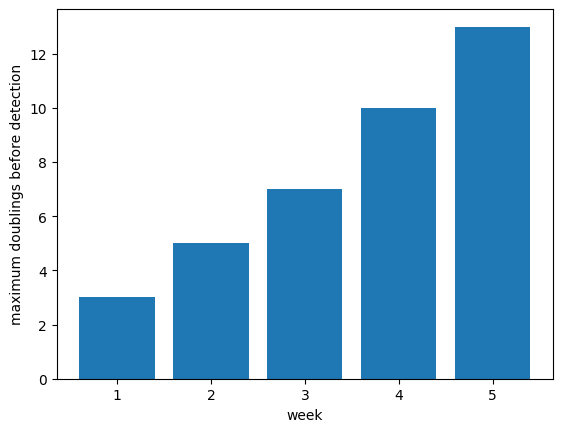

In [76]:
# START EDITING HERE - DON'T REMOVE THIS COMMENT

# Fit PCA model to link traffic of week 0
pca.fit(link_traffic[:,:,0])

saved_doublings = np.zeros(len(wks))

for wk in wks:
  # Create adaptive by training on previous week's stressed link traffic
  if wk > 1:
    pca.fit(link_traffic_stressed)

  # Copy original flow traffic for this week
  flow_traffic_stressed = flow_traffic[:,:,wk].copy()
  
  # Keep doubling traffic along stressed flow until an anomaly is detected
  for doubling in range(1,20):

    flow_traffic_stressed[:,stress_flow] *= 2
    link_traffic_stressed = np.matmul(flow_traffic_stressed, routing_matrix.T)
    residuals = get_residuals(pca, link_traffic_stressed)

    # if anomaly detected, break before saving
    if any(residuals > threshold):
      break

    saved_doublings[wk-1] = doubling

# END EDITING HERE - DON'T REMOVE THIS COMMENT

# Week-by-week bar chart of maximum doublings of stressed flow before detection
plt.bar(wks, saved_doublings)
plt.xlabel('week')
plt.ylabel('maximum doublings before detection')

**4.7** (10 pts) Can an attacker in Los Angeles execute a weeklong DoS attack of arbitrarily large size against a host in New York City while completely evading this adaptive detector? Explain your answer in 1-2 sentences.

WRITE YOUR ANSWER HERE:
Yes, as for 1, the number of doublings increases a lot week to week so there's far more leeway for an attacker to attack with a large attack, and for 2, the attacker could slowly and increasingly poison the network to increase the threshold steadily as he prepares for his attack to occur on a specific week.